### **1. Importando as bibliotecas e bases:**

In [1]:
# Importando as bibliotecas
import pandas as pd                        
import numpy as np                             
import seaborn as sns          
import matplotlib                       
import matplotlib.pyplot as plt     
import sklearn
import wordcloud               
from sklearn.cluster import KMeans              
from wordcloud import WordCloud
import sys

In [2]:
# Configurações Matplotlib
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = True

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 8

In [3]:
nomes_bibliotecas = ["Pandas","Numpy","Seaborn","Matplotlib","SKlearn","WordCloud"]
bibliotecas = [pd, np, sns, matplotlib, sklearn, wordcloud]


for n,b in zip(nomes_bibliotecas, bibliotecas):
    print(f"Biblioteca: {n:<15} Versão: {b.__version__:^5}")


Biblioteca: Pandas          Versão: 2.2.2
Biblioteca: Numpy           Versão: 1.26.4
Biblioteca: Seaborn         Versão: 0.13.2
Biblioteca: Matplotlib      Versão: 3.9.0
Biblioteca: SKlearn         Versão: 1.5.0
Biblioteca: WordCloud       Versão: 1.9.3


In [4]:
# Importando a base
data = pd.read_csv('../data/data.csv')

In [5]:
print(f"Base: {'data':<{10}}  Linhas: {data.shape[0]:^{4}}  Colunas:{data.shape[1]:>{4}}") 

Base: data        Linhas: 170653  Colunas:  19


### **2. Analisando a base:**

#### **2.1. Análise inicial:**

In [6]:
# Três primeiras linhas
data.head(3)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339


In [7]:
# Três últimas linhas
data.tail()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
170648,0.608,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.734,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.637,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.195,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055
170652,0.642,2020,0.13200,"['KEVVO', 'J Balvin']",0.856,189507,0.721,1,7HmnJHfs0BkFzX4x8j0hkl,0.004710,7,0.1820,-4.928,1,Billetes Azules (with J Balvin),74,2020-10-16,0.1080,94.991


In [8]:
# Informações da colunas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [9]:
# Valores nulos por coluna
data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [10]:
# Linhas duplicadas da base (apagando o id, pois ele nã se repete)
data.drop('id',axis=1).duplicated().sum()

543

In [11]:
# Estatísticas das colunas
data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [12]:
# Valores únicos por coluna
data.nunique()

valence               1733
year                   100
acousticness          4689
artists              34088
danceability          1240
duration_ms          51755
energy                2332
explicit                 2
id                  170653
instrumentalness      5401
key                     12
liveness              1740
loudness             25410
mode                     2
name                133638
popularity             100
release_date         11244
speechiness           1626
tempo                84694
dtype: int64

#### **2.2. Analisando valores duplicados:**

In [13]:
data_sem_id = data.drop('id',axis=1).copy()
data_sem_id.loc[data_sem_id.duplicated(keep=False)].sort_values(by=["year","valence","energy","loudness"]).head(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
20333,0.0377,1928,0.995,"['Alexander Scriabin', 'Vladimir Horowitz']",0.316,216560,0.0513,0,0.893,6,0.3250,-23.939,1,"Etude in B-Flat Minor, Op. 8, No. 7",0,1928,0.0496,133.833
75636,0.0377,1928,0.995,"['Alexander Scriabin', 'Vladimir Horowitz']",0.316,216560,0.0513,0,0.893,6,0.3250,-23.939,1,"Etude in B-Flat Minor, Op. 8, No. 7",0,1928,0.0496,133.833
75474,0.0382,1928,0.995,"['Alexander Scriabin', 'Vladimir Horowitz']",0.449,389107,0.0927,0,0.892,6,0.1570,-20.592,1,"Sonata No. 3, Op. 23 in F-Sharp Minor: I. Dram...",0,1928,0.0523,73.751
75628,0.0382,1928,0.995,"['Alexander Scriabin', 'Vladimir Horowitz']",0.449,389107,0.0927,0,0.892,6,0.1570,-20.592,1,"Sonata No. 3, Op. 23 in F-Sharp Minor: I. Dram...",0,1928,0.0523,73.751
39040,0.0382,1928,0.991,"['Alexander Scriabin', 'Vladimir Horowitz']",0.300,733493,0.1010,0,0.879,4,0.1670,-19.827,1,"Sonata No. 5, Op. 53",0,1928,0.0448,72.877
92575,0.0382,1928,0.991,"['Alexander Scriabin', 'Vladimir Horowitz']",0.300,733493,0.1010,0,0.879,4,0.1670,-19.827,1,"Sonata No. 5, Op. 53",0,1928,0.0448,72.877
75618,0.0386,1928,0.994,"['Sergei Rachmaninoff', 'Vladimir Horowitz']",0.371,370773,0.0284,0,0.906,4,0.0791,-23.766,0,"Piano Sonata No. 2 in B-Flat Minor, Op. 36: II...",0,1928,0.0450,134.806
92598,0.0386,1928,0.994,"['Sergei Rachmaninoff', 'Vladimir Horowitz']",0.371,370773,0.0284,0,0.906,4,0.0791,-23.766,0,"Piano Sonata No. 2 in B-Flat Minor, Op. 36: II...",0,1928,0.0450,134.806
20392,0.0388,1928,0.984,"['Sergei Rachmaninoff', 'Vladimir Horowitz', '...",0.288,706360,0.0723,0,0.850,1,0.1140,-21.173,1,"Piano Concerto No. 3 in D Minor, Op. 30: II. I...",0,1928,0.0368,111.135
38993,0.0388,1928,0.984,"['Sergei Rachmaninoff', 'Vladimir Horowitz', '...",0.288,706360,0.0723,0,0.850,1,0.1140,-21.173,1,"Piano Concerto No. 3 in D Minor, Op. 30: II. I...",0,1928,0.0368,111.135


In [14]:
# Removendo os indices duplicados da base "data"
indices_duplicados = data_sem_id.loc[data_sem_id.duplicated()].index
data = data.drop(indices_duplicados, axis=0).reset_index(drop=True)
data.shape

(170110, 19)

In [15]:
data.tail(1)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
170109,0.642,2020,0.132,"['KEVVO', 'J Balvin']",0.856,189507,0.721,1,7HmnJHfs0BkFzX4x8j0hkl,0.00471,7,0.182,-4.928,1,Billetes Azules (with J Balvin),74,2020-10-16,0.108,94.991


Como podemos ver acima, há registros nulos. Se não tivéssemos excluido a coluna de id, não teríamos detectados essas duplicidades.

In [16]:
# Contagem de linhas antes e depois de apagar as duplicatas
print(data_sem_id.shape[0])
data_sem_id = data_sem_id.drop_duplicates()
print(data_sem_id.shape[0])

170653
170110


#### **2.3. Analisando os valores das colunas:**

##### **2.3.1. release_date:**

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170110 entries, 0 to 170109
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170110 non-null  float64
 1   year              170110 non-null  int64  
 2   acousticness      170110 non-null  float64
 3   artists           170110 non-null  object 
 4   danceability      170110 non-null  float64
 5   duration_ms       170110 non-null  int64  
 6   energy            170110 non-null  float64
 7   explicit          170110 non-null  int64  
 8   id                170110 non-null  object 
 9   instrumentalness  170110 non-null  float64
 10  key               170110 non-null  int64  
 11  liveness          170110 non-null  float64
 12  loudness          170110 non-null  float64
 13  mode              170110 non-null  int64  
 14  name              170110 non-null  object 
 15  popularity        170110 non-null  int64  
 16  release_date      17

In [18]:
data.release_date.value_counts().sort_values(ascending=True)

release_date
2020-11-03       1
1984-05-24       1
1985-11-20       1
1985-11-10       1
1985-04-15       1
              ... 
1948          1034
1935          1078
1926          1099
1949          1225
1945          1332
Name: count, Length: 11244, dtype: int64

Como podemos ver acima, alguns registros estão com a data completa, fugindo do padrão da coluna.

In [19]:
# Pegando apenas os 4 primeiros caractéres:
data['release_date'] = data['release_date'].str[:4]

data.release_date.value_counts().sort_values(ascending=True).head(10)

release_date
1922     71
1921    150
1923    185
1924    236
1925    278
1932    502
1934    578
1938    613
1927    615
1937    657
Name: count, dtype: int64

##### **2.3.2. artists**

In [20]:
data.head(3)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339


In [21]:
data.artists = data.artists.str.replace("['",'')
data.artists = data.artists.str.replace("']",'')
data.artists = data.artists.str.replace("'",'')
data.head(3)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339


In [22]:
data_artists_expand = data.artists.str.split(',', expand=True)
data_artists_expand = data_artists_expand.fillna('-')
data_artists_expand = data_artists_expand.rename(columns={i: f"artist_{i+1}" for i in data_artists_expand.columns})
data_artists_expand

,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6,artist_7,artist_8,artist_9,artist_10,...,artist_31,artist_32,artist_33,artist_34,artist_35,artist_36,artist_37,artist_38,artist_39,artist_40
0,Sergei Rachmaninoff,James Levine,Berliner Philharmoniker,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,Dennis Day,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,Frank Parker,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,Phil Regan,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170105,Anuel AA,Daddy Yankee,KAROL G,Ozuna,J Balvin,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
170106,Ashnikko,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
170107,MAMAMOO,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
170108,Eminem,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [23]:
data = pd.concat([data, data_artists_expand],axis=1)

pd.set_option('display.max_columns', 80)
    
display(data.head(3))

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6,artist_7,artist_8,artist_9,artist_10,artist_11,artist_12,artist_13,artist_14,artist_15,artist_16,artist_17,artist_18,artist_19,artist_20,artist_21,artist_22,artist_23,artist_24,artist_25,artist_26,artist_27,artist_28,artist_29,artist_30,artist_31,artist_32,artist_33,artist_34,artist_35,artist_36,artist_37,artist_38,artist_39,artist_40
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,Sergei Rachmaninoff,James Levine,Berliner Philharmoniker,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,Dennis Day,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


### **3. Analisando colunas relacionadas diretamente as músicas:**

#### **3.1. Pegando as colunas:**

In [24]:
colunas = ['name','year','popularity','duration_ms','key','tempo','mode','explicit','acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','valence']

base = data[colunas].copy()
base.head()


,name,year,popularity,duration_ms,key,tempo,mode,explicit,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",1921,4,831667,10,80.954,1,0,0.982,0.279,0.211,0.878000,0.665,-20.096,0.0366,0.0594
1,Clancy Lowered the Boom,1921,5,180533,7,60.936,1,0,0.732,0.819,0.341,0.000000,0.160,-12.441,0.4150,0.9630
2,Gati Bali,1921,5,500062,3,110.339,1,0,0.961,0.328,0.166,0.913000,0.101,-14.850,0.0339,0.0394
3,Danny Boy,1921,3,210000,5,100.109,1,0,0.967,0.275,0.309,0.000028,0.381,-9.316,0.0354,0.1650
4,When Irish Eyes Are Smiling,1921,2,166693,3,101.665,1,0,0.957,0.418,0.193,0.000002,0.229,-10.096,0.0380,0.2530


#### **3.2. Analisando as distribuições das colunas:**

##### **3.2.1. Histogramas e Gráficos de Caixa:**

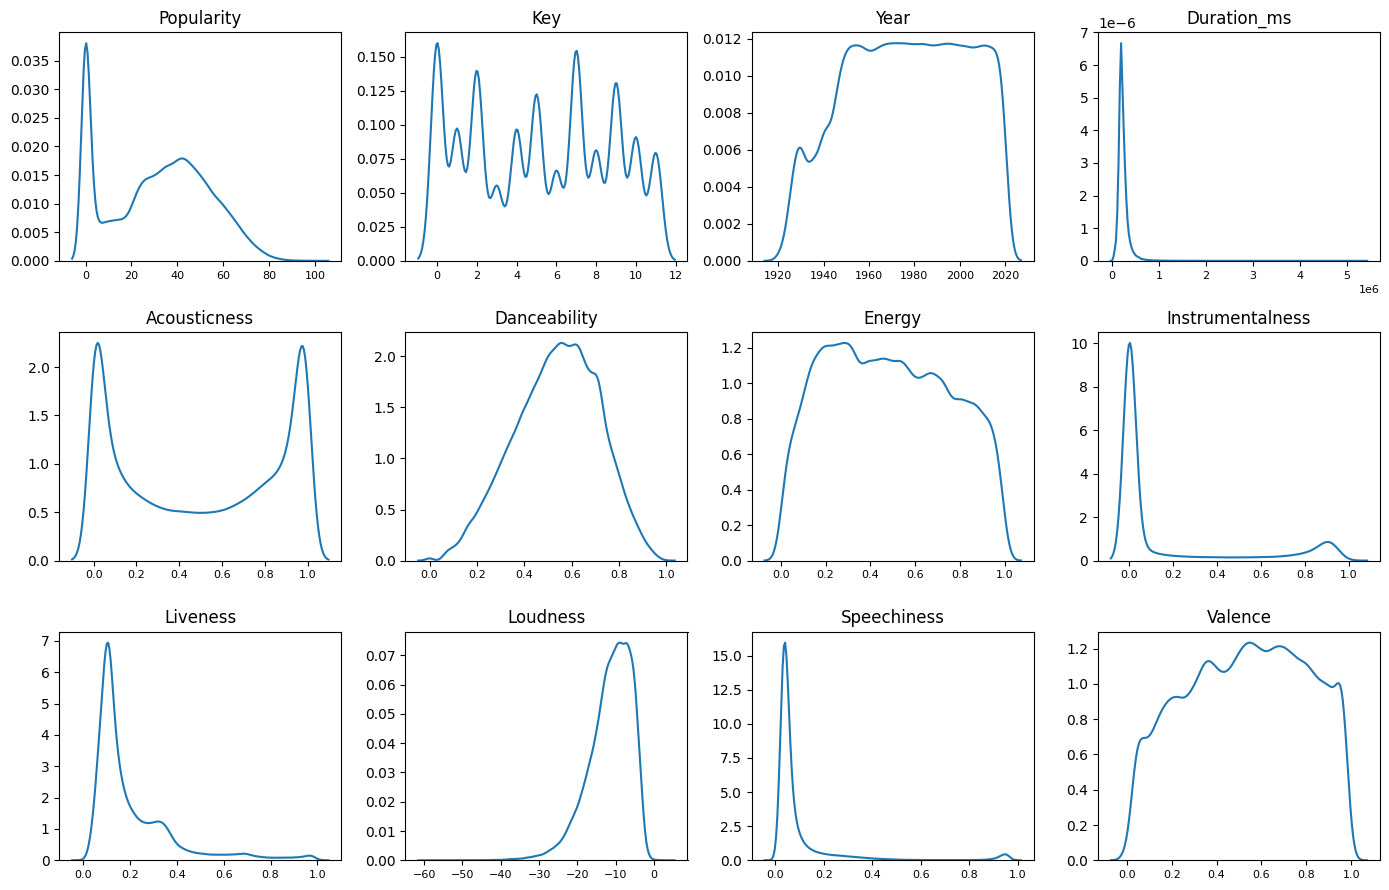

In [25]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(14,9), tight_layout=True)

colunas = ['popularity', 'key', 'year', 'duration_ms', 
           'acousticness', 'danceability', 'energy', 'instrumentalness',
           'liveness', 'loudness', 'speechiness', 'valence']

for i,col in zip(ax.flat, colunas):
    sns.kdeplot(base[col], ax=i)
    i.set_title(col.capitalize(), fontsize=12)
    i.set_xlabel('')
    i.set_ylabel('')
    i.spines['left'].set_visible(True)
    i.spines['right'].set_visible(True)
    i.spines['top'].set_visible(True)
plt.savefig("../images/EDA01_01_distribuicoes_colunas.png")
plt.show()

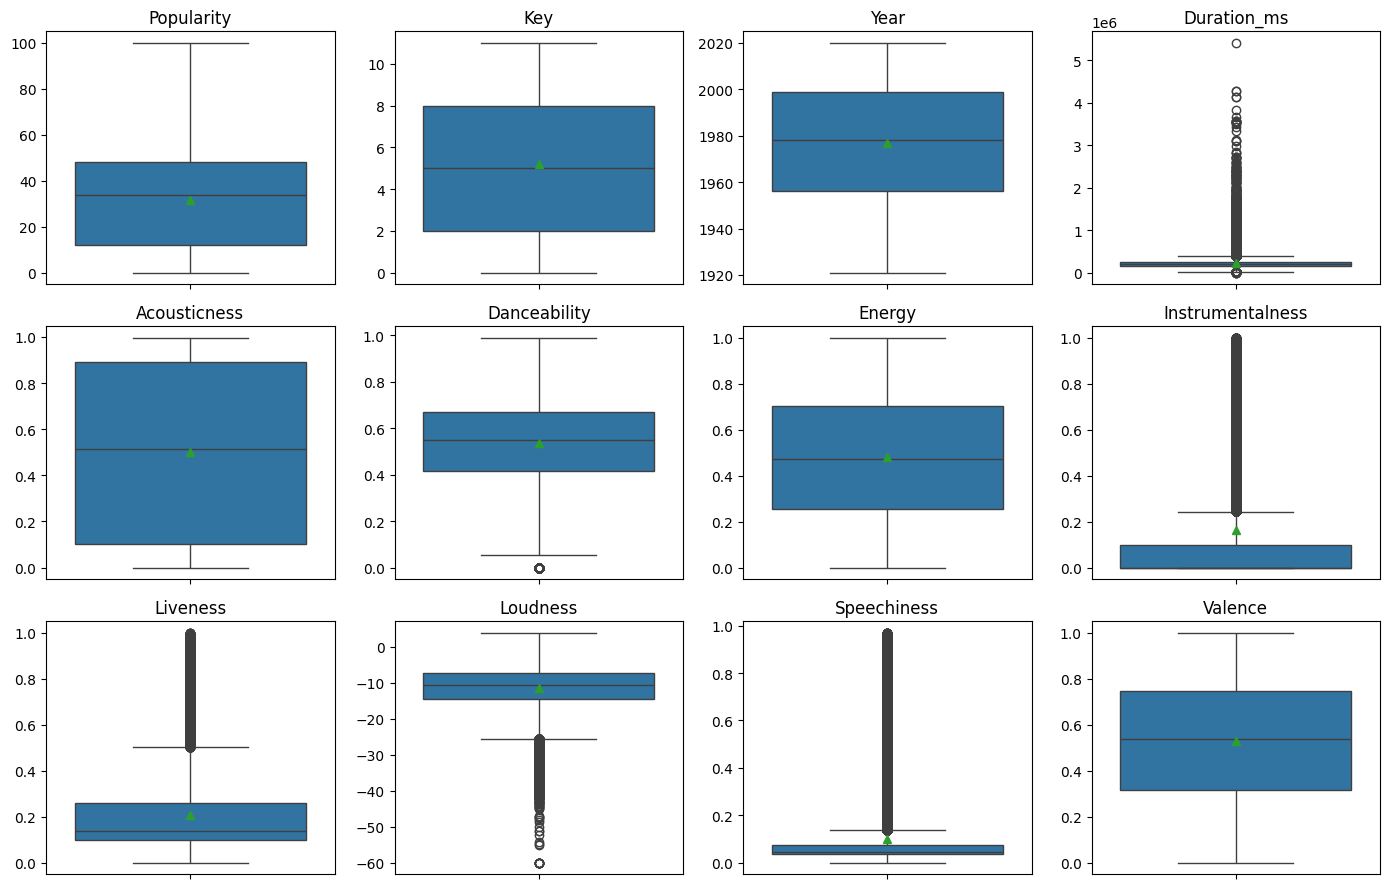

In [26]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(14,9), tight_layout=True)

colunas = ['popularity', 'key', 'year', 'duration_ms', 
           'acousticness', 'danceability', 'energy', 'instrumentalness',
           'liveness', 'loudness', 'speechiness', 'valence']

for i,col in zip(ax.flat, colunas):
    sns.boxplot(base[col], showmeans=True, ax=i)
    i.set_title(col.capitalize(), fontsize=12)
    i.set_xlabel('')
    i.set_ylabel('')
    i.spines['left'].set_visible(True)
    i.spines['right'].set_visible(True)
    i.spines['top'].set_visible(True)
plt.savefig("../images/EDA01_02_boxplot_colunas.png")
plt.show()

##### **3.2.2. Analisando diante a popularidade:**

In [27]:
base['cut_popularity']  = pd.cut(base['popularity'], 
                                 bins=[0,1,10,20,30,40,50,60,80,100],
                                 labels=['0','1-10','11-20','21-30','31-40','41-50','51-60','61-80','81-100'],
                                 right=False)

base[['popularity','cut_popularity']].head(10)

,popularity,cut_popularity
0,4,1-10
1,5,1-10
2,5,1-10
3,3,1-10
4,2,1-10
5,6,1-10
6,4,1-10
7,2,1-10
8,0,0
9,0,0


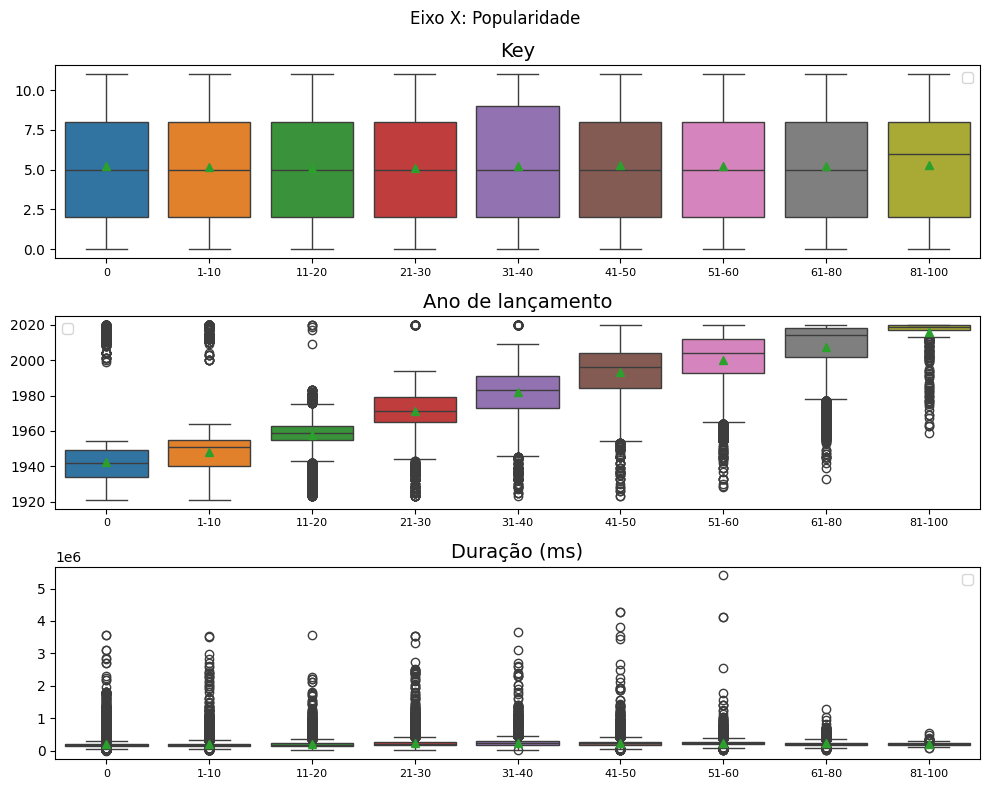

In [28]:
fig, ax = plt.subplots(nrows=3,figsize=(10,8), tight_layout=True)

colunas = ['key', 'year', 'duration_ms']
titulos = ['Key', 'Ano de lançamento', 'Duração (ms)']

for i,col,t in zip(ax.flat, colunas, titulos):
    sns.boxplot(y=base[col],x=base['cut_popularity'],hue=base['cut_popularity'], showmeans=True, ax=i)
    i.set_title(col.capitalize(), fontsize=12)
    i.set_xlabel('')
    i.set_ylabel('')
    i.spines['left'].set_visible(True)
    i.spines['right'].set_visible(True)
    i.spines['top'].set_visible(True)
    i.set_title(t)
    i.legend('')


plt.suptitle("Eixo X: Popularidade")
plt.savefig("../images/EDA01_03_boxplot_key_year_ms.png")
plt.show()

In [29]:
correlacoes = base[['popularity', 'key', 'year', 'duration_ms', 
                    'acousticness', 'danceability', 'energy', 'instrumentalness',
                    'liveness', 'loudness', 'speechiness', 'valence','mode','explicit','tempo']]

correlacoes.head(3)

,popularity,key,year,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,mode,explicit,tempo
0,4,10,1921,831667,0.982,0.279,0.211,0.878,0.665,-20.096,0.0366,0.0594,1,0,80.954
1,5,7,1921,180533,0.732,0.819,0.341,0.000,0.160,-12.441,0.4150,0.9630,1,0,60.936
2,5,3,1921,500062,0.961,0.328,0.166,0.913,0.101,-14.850,0.0339,0.0394,1,0,110.339


In [30]:
correlacoes['explicit'].value_counts()

explicit
0    155678
1     14432
Name: count, dtype: int64

In [31]:
correlacoes['key'].value_counts().sort_index()

key
0     21534
1     12852
2     18757
3      7261
4     12900
5     16379
6      8712
7     20742
8     10718
9     17534
10    12085
11    10636
Name: count, dtype: int64

In [32]:
correlacoes['mode'].value_counts()

mode
1    120268
0     49842
Name: count, dtype: int64

##### **3.2.3. Analisando colunas com a Popularidade e Mode**

In [33]:
sys.path.insert(0,'../functions')
from funcoes import graficos_box
help(graficos_box)

Help on function graficos_box in module funcoes:

graficos_box(base, colunas, coluna_x, coluna_hue, titulos, salvar, nome_salvar)
    colunas ----> 3 colunas para os gráficos
    coluna_x ---> Coluna do eixo X
    coluna_hue -> Coluna para o parâmetro "hue" do boxplot
    titulos ----> Lista com os três títulos dos gráficos
    salvar -----------------> Booleano, True para salvar e False para não salvar. Padrão = False
    nome_salvar ------------> Nome para salvar



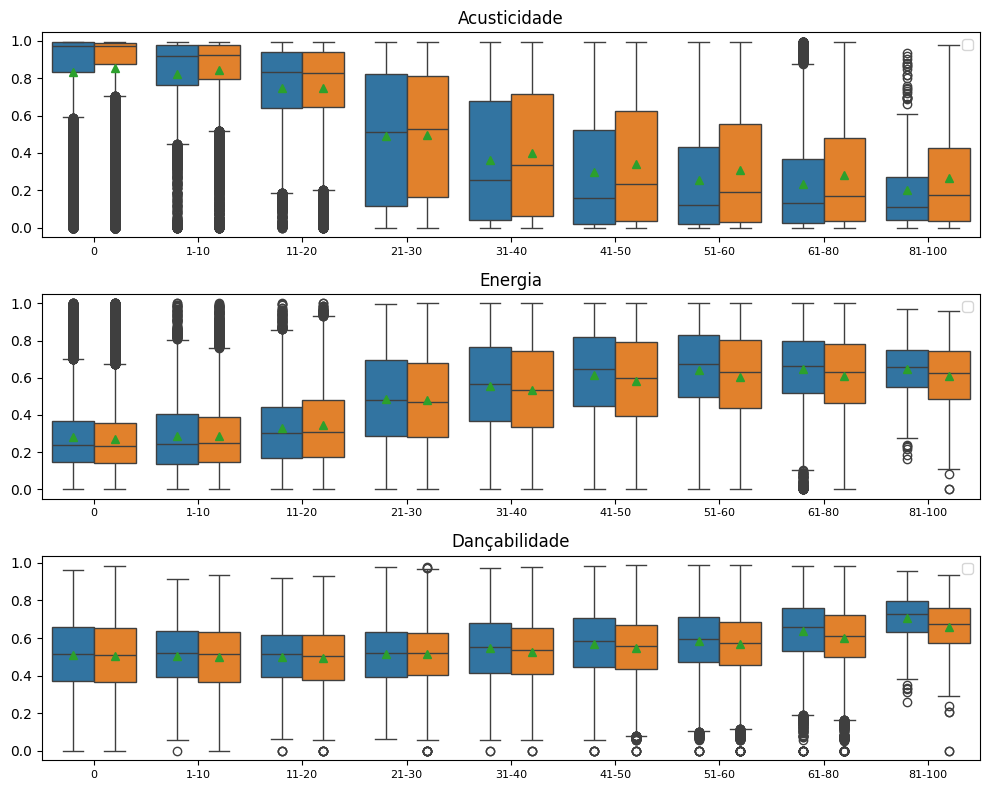

In [34]:
colunas = ['acousticness', 'energy', 'danceability']
titulos = ['Acusticidade', 'Energia', 'Dançabilidade']
graficos_box(base=base, colunas = colunas, coluna_x ='cut_popularity', coluna_hue = 'mode',titulos=titulos, salvar=True, nome_salvar="EDA01_04_boxplot_popularidade_1")

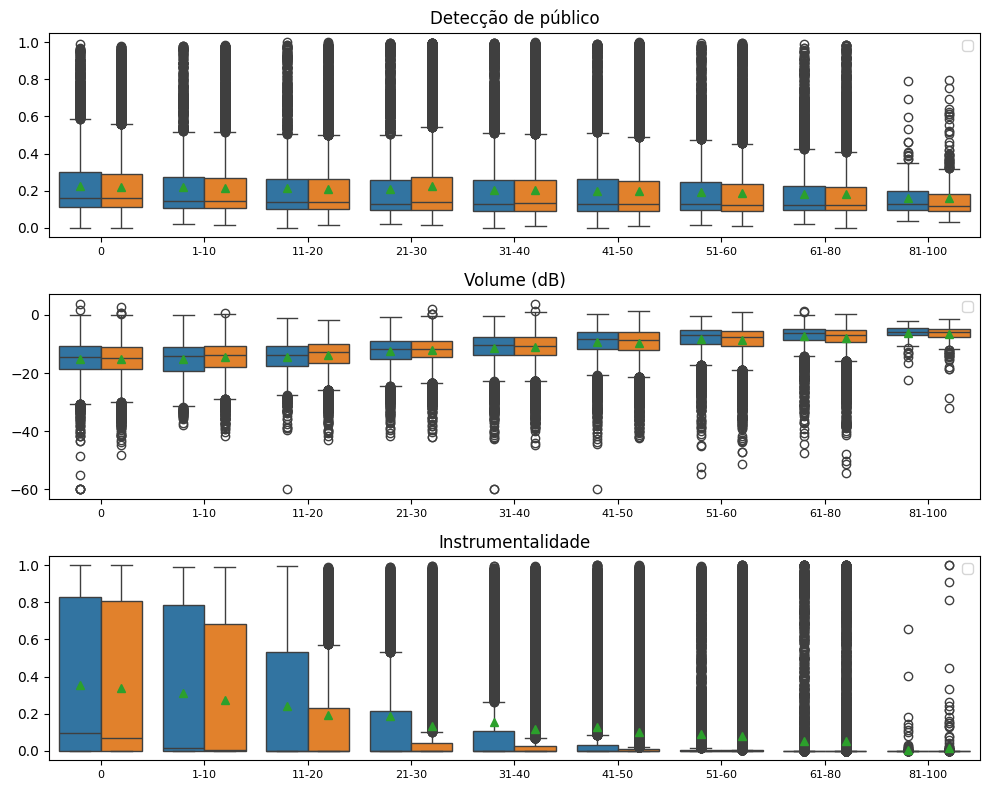

In [35]:
colunas = ['liveness', 'loudness', 'instrumentalness']
titulos = ['Detecção de público', 'Volume (dB)', 'Instrumentalidade']
graficos_box(base = base, colunas = colunas, coluna_x ='cut_popularity', coluna_hue = 'mode',titulos=titulos, salvar=True, nome_salvar="EDA01_04_boxplot_popularidade_2")

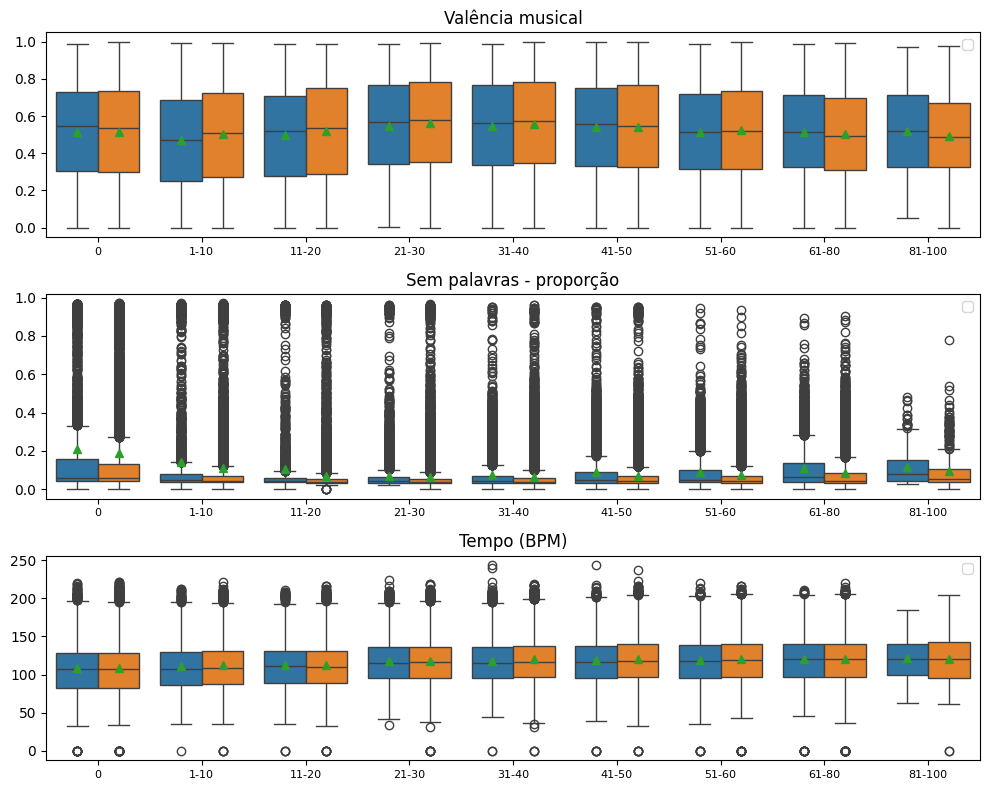

In [36]:
colunas = ['valence','speechiness','tempo']
titulos = ['Valência musical', 'Sem palavras - proporção', 'Tempo (BPM)']
graficos_box(base=base, colunas = colunas, coluna_x ='cut_popularity', coluna_hue = 'mode',titulos=titulos, salvar=True, nome_salvar="EDA01_04_boxplot_popularidade_3")

##### **3.2.4. Avaliando correlações:**

In [37]:
base1 = base.drop(['popularity','cut_popularity'],axis=1).copy()
correlacoes = base1.drop('name',axis=1).corr()

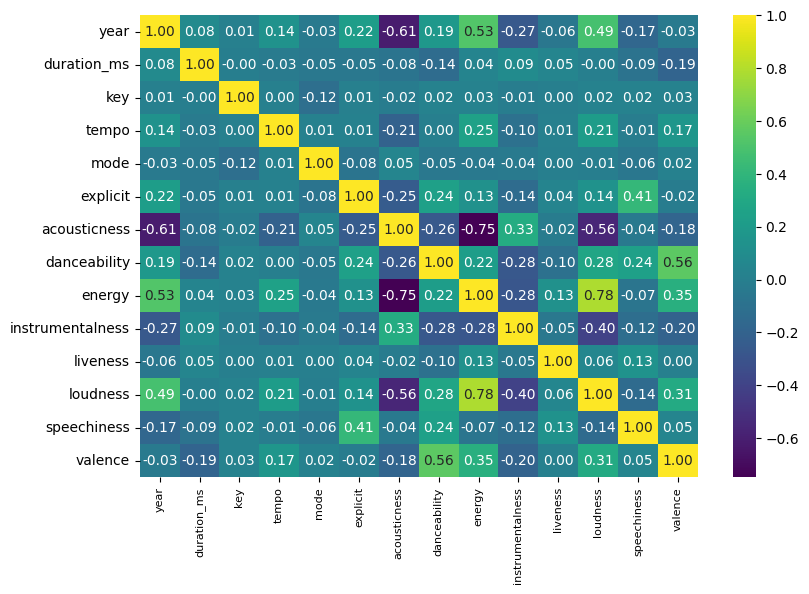

In [38]:
plt.figure(figsize=(9,6))
sns.heatmap(correlacoes, annot=True, fmt=".2f", cmap="viridis")
plt.savefig("../images/EDA01_05_correlacoes.png")

**3.2.4.1 Acousticness:**

In [39]:
sys.path.insert(0,'../functions')
from funcoes import tres_scatters
help(tres_scatters)

Help on function tres_scatters in module funcoes:

tres_scatters(base, col_x, tres_colunas, color, size, alpha, salvar, nome_salvar)
    Função para plotar 3 gráficos scatter em sequência.
    
    base ----------------> Base de dados
    col_x ---------------> Columa do eixo x
    tres_colunas --------> Três colunas para o eixo y
    color ---------------> Cor dos pontos
    Size ----------------> Tamanho dos pontos
    Alpha ---------------> Mexe na transparência dos pontos
    salvar -----------------> Booleano, True para salvar e False para não salvar. Padrão = False
    nome_salvar ------------> Nome para salvar



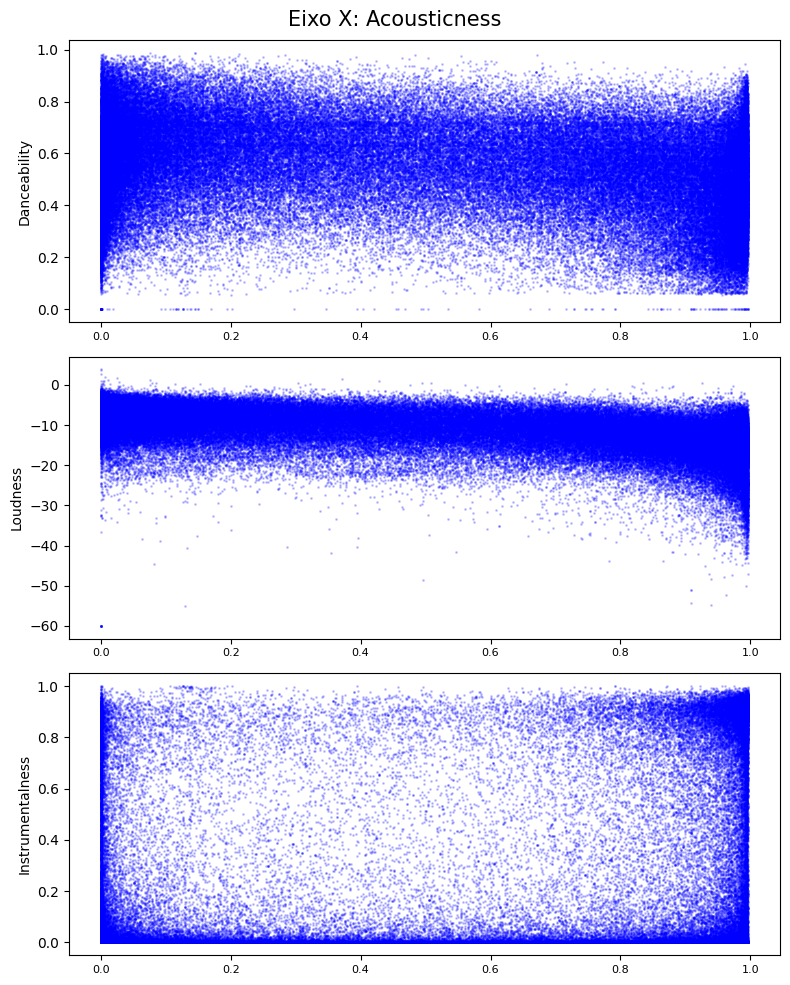

In [40]:
tres_scatters(base=base1,
              col_x='acousticness',
              tres_colunas=['danceability','loudness','instrumentalness'],
              color='blue',
              size=1,
              alpha=0.2,
              salvar=True,
              nome_salvar = 'EDA01_06_scatters_acusticidade')

**3.2.4.2 Energy:**

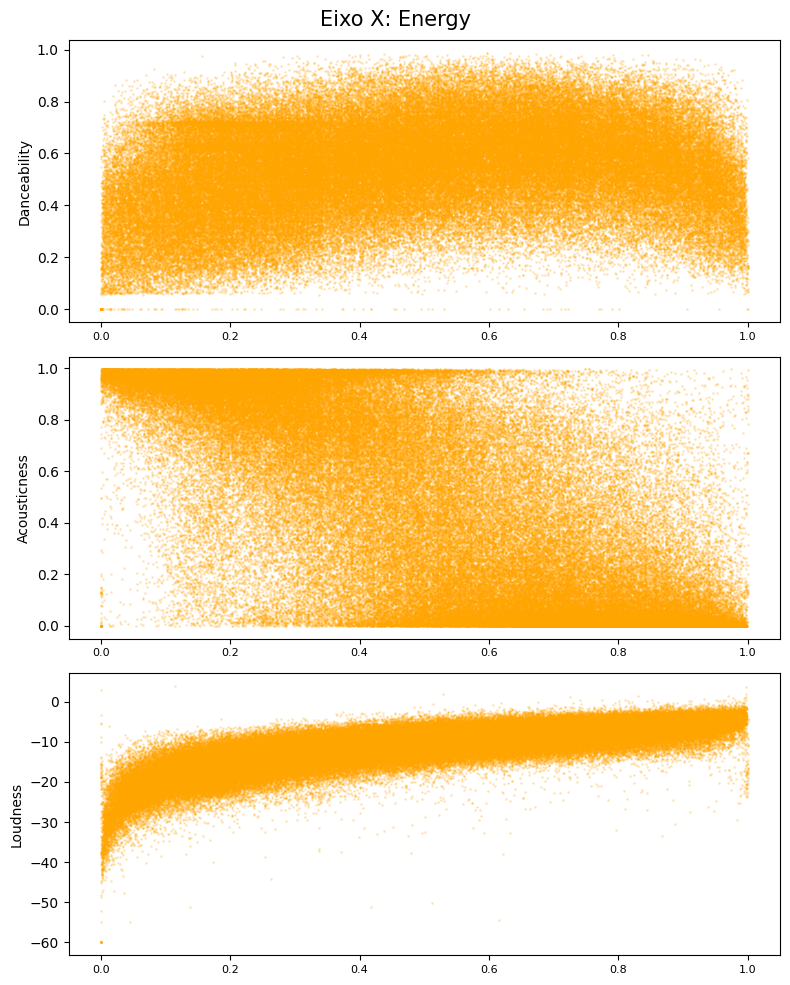

In [41]:
tres_scatters(base=base1,
              col_x='energy',
              tres_colunas=['danceability','acousticness','loudness'],
              color='orange',
              size=1,
              alpha=0.2,
              salvar=True,
              nome_salvar = 'EDA01_06_scatters_energia')

**3.2.4.3 Danceability:**

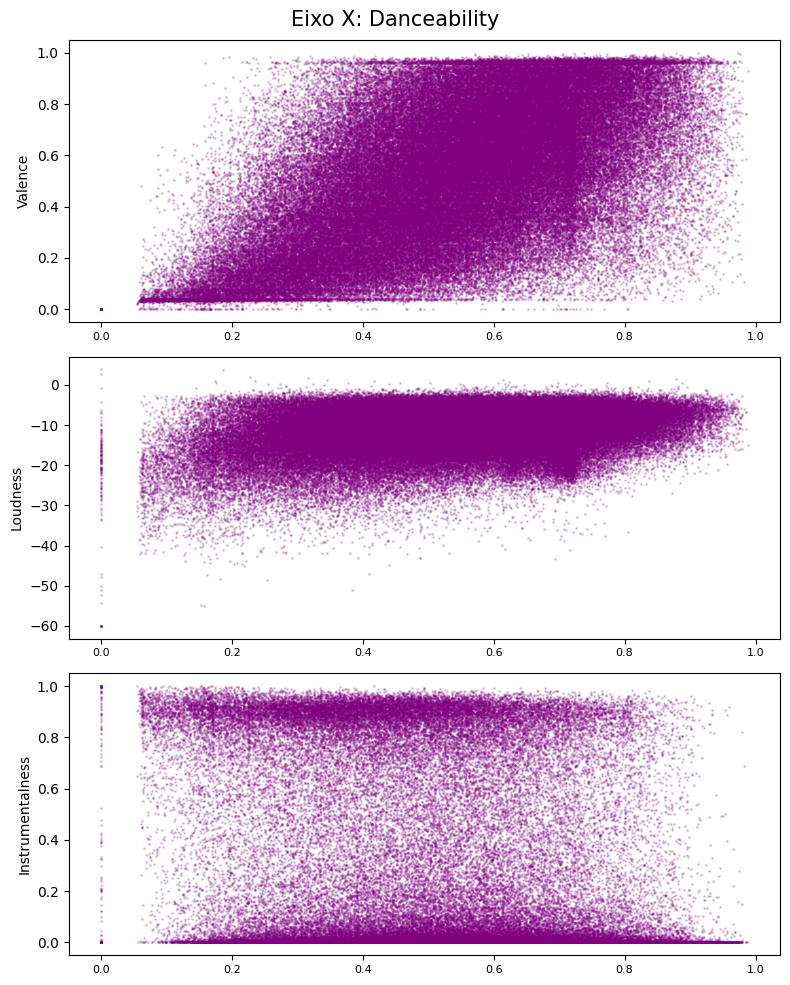

In [42]:
tres_scatters(base=base1,
              col_x='danceability',
              tres_colunas=['valence','loudness','instrumentalness'],
              color='purple',
              size=1,
              alpha=0.2,
              salvar=True,
              nome_salvar = 'EDA01_06_scatters_dancabilidade')

#### **3.3 Visualizando correlações que se destacam:**

In [43]:
import sys
sys.path.insert(0, "../functions")

from funcoes import graficos_correlacoes
help(graficos_correlacoes)

Help on function graficos_correlacoes in module funcoes:

graficos_correlacoes(base_dados_numericos, coluna_x, gridsize, cmap, salvar, nome_salvar)
    Função para exibir 4 gráficos de Compartimentação Hexagonal das variáveis com maiores corralações (nesse caso, o valor absoluto), com a coluna do coluna_x:
    
    base_dados_numericos ---> A base de dados (apenas colunas numéricas)
    coluna_x ---------------> Coluna base para o eixo X
    gridsize ---------------> Tamanho da grade hexagonal 
    cmap -------------------> Mapa de cores 
    salvar -----------------> Booleano, True para salvar e False para não salvar. Padrão = False
    nome_salvar ------------> Nome para salvar



In [44]:
base_teste = base1.drop('name',axis=1).copy()

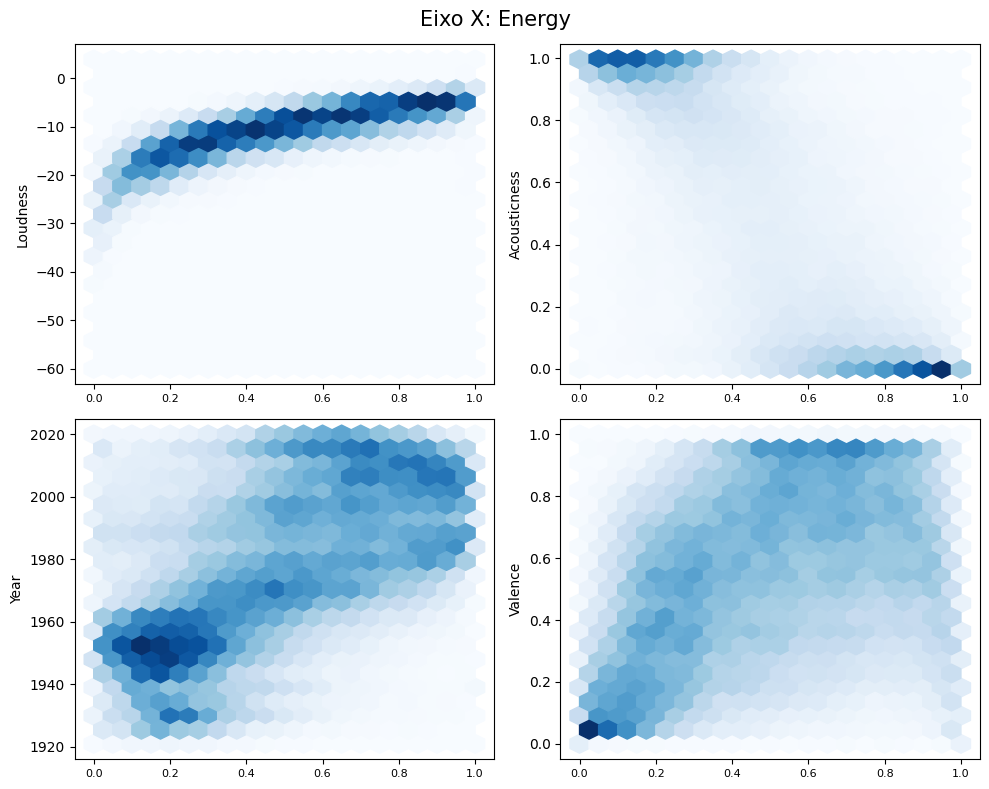

In [45]:
graficos_correlacoes(base_teste, 'energy', 20, 'Blues', True, 'EDA01_07_hexagonal_energy')

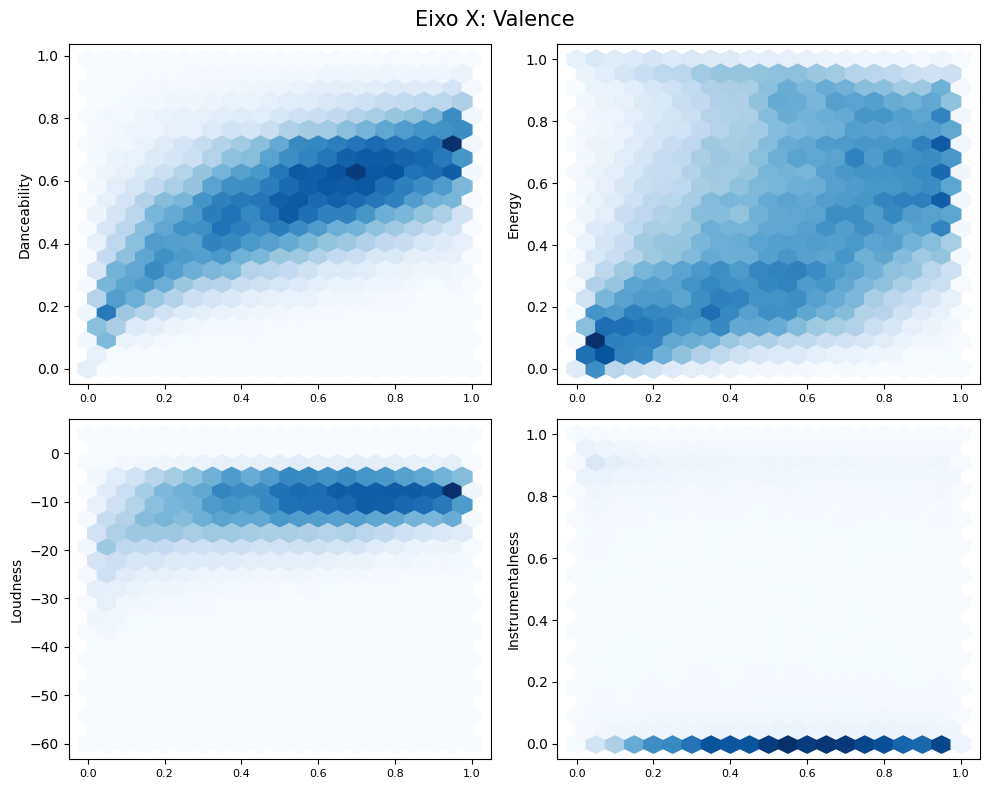

In [46]:
graficos_correlacoes(base_teste, 'valence', 20, 'Blues', True, 'EDA01_07_hexagonal_valence')

### **4. Analisando algumas colunas com mais detalhes:**

#### **4.1 Ano de lançamento:**

In [47]:
correlacoes.year.sort_values()

acousticness       -0.612443
instrumentalness   -0.268155
speechiness        -0.169523
liveness           -0.058112
mode               -0.032598
valence            -0.032128
key                 0.007834
duration_ms         0.080140
tempo               0.139571
danceability        0.185556
explicit            0.220518
loudness            0.485121
energy              0.528180
year                1.000000
Name: year, dtype: float64

In [48]:
print(base1.year.min())
print(base1.year.max())

1921
2020


In [49]:
base1['year_'] = pd.cut(base1['year'],
                        bins=[1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,base1.year.max()+1],
                        labels=['1920-1929','1930-1939','1940-1949','1950-1959','1960-1969',
                                '1970-1979','1980-1989','1990-1999','2000-2009','2010+'], right=False)
                        
                        
base1.tail()

,name,year,duration_ms,key,tempo,mode,explicit,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,year_
170105,China,2020,301714,7,105.029,1,0,0.08460,0.786,0.808,0.000289,0.0822,-3.702,0.0881,0.608,2010+
170106,Halloweenie III: Seven Days,2020,150654,7,137.936,1,0,0.20600,0.717,0.753,0.000000,0.1010,-6.020,0.0605,0.734,2010+
170107,AYA,2020,211280,4,91.688,0,0,0.10100,0.634,0.858,0.000009,0.2580,-2.226,0.0809,0.637,2010+
170108,Darkness,2020,337147,2,75.055,1,1,0.00998,0.671,0.623,0.000008,0.6430,-7.161,0.3080,0.195,2010+
170109,Billetes Azules (with J Balvin),2020,189507,7,94.991,1,1,0.13200,0.856,0.721,0.004710,0.1820,-4.928,0.1080,0.642,2010+


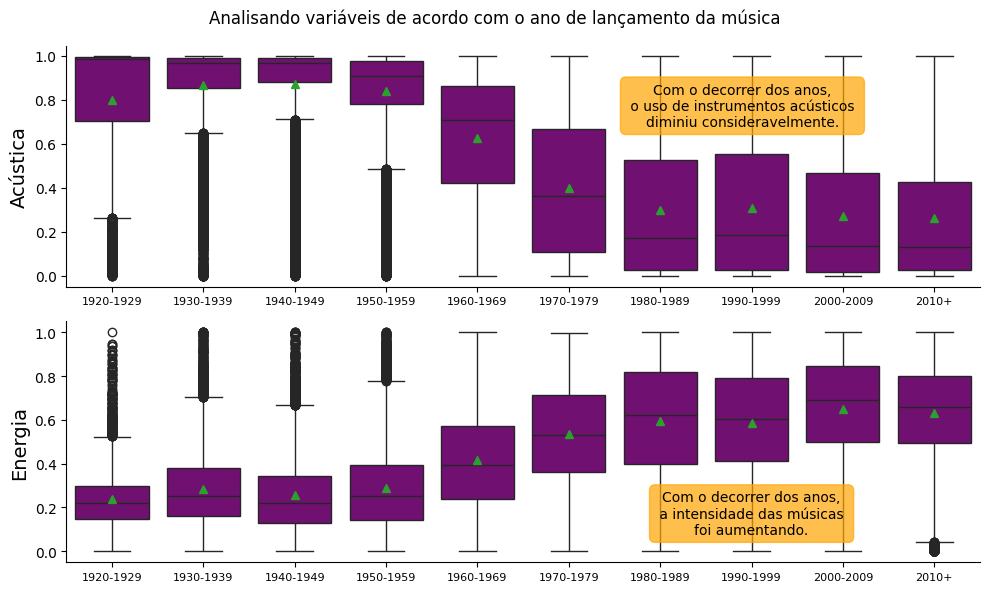

In [50]:
fig, ax = plt.subplots(nrows=2, figsize=(10,6), tight_layout=True)
sns.boxplot(data=base1, x='year_', y='acousticness', color='purple', showmeans=True, ax=ax[0])
sns.boxplot(data=base1, x='year_', y='energy', color='purple', showmeans=True, ax=ax[1])

ax[0].set_ylabel('Acústica', fontsize=14)
ax[1].set_ylabel('Energia', fontsize=14)
ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].text(6.9, 0.68, "Com o decorrer dos anos,\n o uso de instrumentos acústicos \ndiminiu consideravelmente.",ha='center',
           bbox=dict(facecolor='orange', edgecolor='orange', boxstyle='round,pad=0.4', alpha=0.7))

ax[1].text(7, 0.08, "Com o decorrer dos anos,\n a intensidade das músicas \nfoi aumentando.",ha='center',
           bbox=dict(facecolor='orange', edgecolor='orange', boxstyle='round,pad=0.4', alpha=0.7))

ax[0].spines['left'].set_visible(True)
ax[1].spines['left'].set_visible(True)

plt.suptitle("Analisando variáveis de acordo com o ano de lançamento da música")
plt.savefig("../images/EDA01_08_boxplots_ano_lancamento.png")
plt.show()

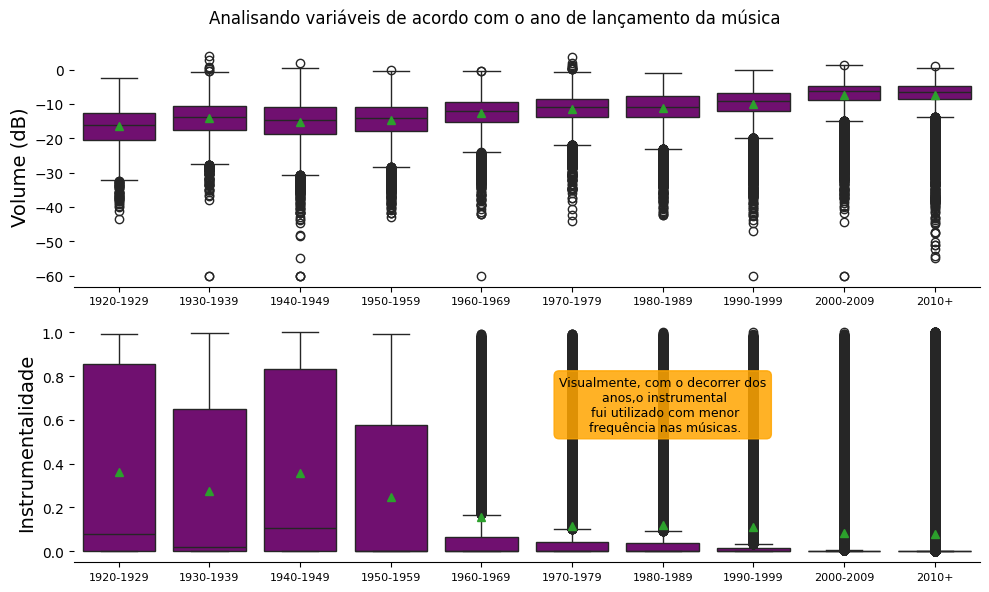

In [51]:
fig, ax = plt.subplots(nrows=2, figsize=(10,6), tight_layout=True)
sns.boxplot(data=base1, x='year_', y='loudness', color='purple', showmeans=True, ax=ax[0])
sns.boxplot(data=base1, x='year_', y='instrumentalness', color='purple', showmeans=True, ax=ax[1])

ax[0].set_ylabel('Volume (dB)', fontsize=14)
ax[1].set_ylabel('Instrumentalidade', fontsize=14)
ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[1].text(6, 0.55, "Visualmente, com o decorrer dos\n anos,o instrumental\n fui utilizado com menor\n frequência nas músicas.",ha='center',fontsize=9,
           bbox=dict(facecolor='orange', edgecolor='orange', boxstyle='round,pad=0.4', alpha=0.85))

plt.suptitle("Analisando variáveis de acordo com o ano de lançamento da música")
plt.savefig("../images/EDA01_08_boxplots_ano_lancamento_2.png")
plt.show()

#### **4.2 Valência:**

- ChatGPT:
    - Valence baixo (próximo de 0): Essas faixas tendem a evocar sentimentos negativos, como tristeza, raiva, ou melancolia. Elas são comuns em músicas de gêneros como blues, algumas formas de música clássica, ou baladas tristes.
    - Valence alto (próximo de 1): Essas faixas tendem a evocar sentimentos positivos, como felicidade, alegria, e energia positiva. Elas são comuns em músicas pop, dance, ou outros gêneros que frequentemente transmitem uma sensação alegre


In [52]:
print(base1.valence.min())
print(base1.valence.max())

0.0
1.0


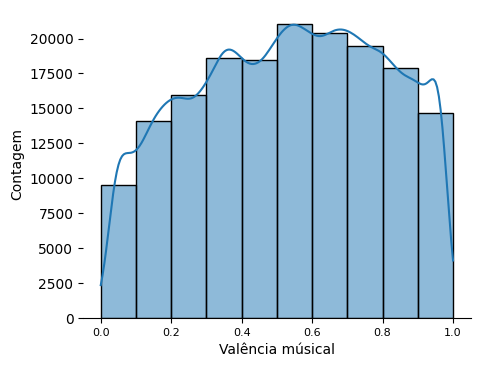

In [53]:
fig, ax = plt.subplots(figsize=(5,4))
sns.histplot(base1.valence, kde=True, bins=10)
ax.set_ylabel("Contagem")
ax.set_xlabel("Valência músical")
plt.savefig("../images/EDA01_09_histograma_valencia.png")
plt.show()

In [54]:
correlacoes.valence.sort_values()

instrumentalness   -0.195849
duration_ms        -0.191721
acousticness       -0.181697
year               -0.032128
explicit           -0.019389
liveness            0.003397
mode                0.015631
key                 0.028693
speechiness         0.045751
tempo               0.170744
loudness            0.310965
energy              0.351915
danceability        0.557809
valence             1.000000
Name: valence, dtype: float64

In [55]:
base1['valence_'] = pd.cut(base1['valence'],
                        bins=[-0.1, 0.00001, 0.20, 0.40, 0.60, 0.80, 1.0],
                        labels=['0','>0 - 0.20','0.20 - 0.40','0.40 - 0.60','0.60 - 0.80','0.80 - 1.0'])
                        
base1.head(3)

,name,year,duration_ms,key,tempo,mode,explicit,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,year_,valence_
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",1921,831667,10,80.954,1,0,0.982,0.279,0.211,0.878,0.665,-20.096,0.0366,0.0594,1920-1929,>0 - 0.20
1,Clancy Lowered the Boom,1921,180533,7,60.936,1,0,0.732,0.819,0.341,0.000,0.160,-12.441,0.4150,0.9630,1920-1929,0.80 - 1.0
2,Gati Bali,1921,500062,3,110.339,1,0,0.961,0.328,0.166,0.913,0.101,-14.850,0.0339,0.0394,1920-1929,>0 - 0.20


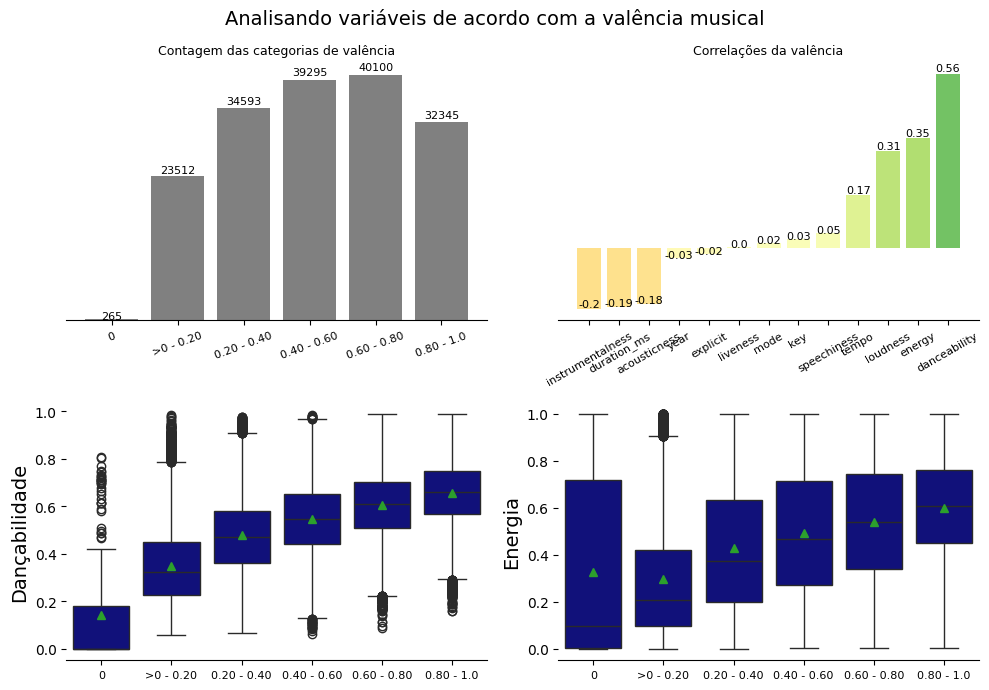

In [56]:
mosaico = "AB;CD"
fig = plt.figure(figsize=(10,7), tight_layout=True)
axs = fig.subplot_mosaic(mosaico)

a = base1.valence_.value_counts().sort_index()
axs["A"].bar(a.index, a.values, color='grey')
for i in range(len(a.index)):
    axs["A"].annotate(a.values[i], (i,a.values[i]+a.values[i]*0.02), ha='center', fontsize=8)
axs["A"].yaxis.set_visible(False)
axs["A"].set_xticks(a.index)
axs["A"].set_title("Contagem das categorias de valência", fontsize=9)
axs["A"].set_xticklabels(labels=a.index, rotation=20)

b = correlacoes['valence'].sort_values()[:-1]
norm = plt.Normalize(-1, 1)
cmap = plt.cm.RdYlGn
colors = cmap(norm(b.values))

axs["B"].bar(b.index, b.values, color=colors)
for i in range(len(b.index)):
    if b.values[i] < 0:
        axs["B"].annotate(round(b.values[i],2), (b.index[i],b.values[i]-b.values[i]*0.02), ha='center', fontsize=8)
    elif b.values[i] >= 0:
        axs["B"].annotate(round(b.values[i],2), (b.index[i],b.values[i]+b.values[i]*0.02), ha='center', fontsize=8)
axs["B"].yaxis.set_visible(False)
axs["B"].set_xticks(b.index)
axs["B"].set_title("Correlações da valência", fontsize=9)
axs["B"].set_xticklabels(labels=b.index, rotation=30, fontsize=8)

sns.boxplot(data=base1, x='valence_', y='danceability', color='darkblue', showmeans=True, ax=axs["C"])
sns.boxplot(data=base1, x='valence_', y='energy', color='darkblue', showmeans=True, ax=axs["D"])
axs["C"].set_ylabel('Dançabilidade', fontsize=14)
axs["D"].set_ylabel('Energia', fontsize=14)
axs["C"].set_xlabel('')
axs["D"].set_xlabel('')

plt.suptitle('Analisando variáveis de acordo com a valência musical', fontsize=14)
plt.savefig("../images/EDA01_09_analise_variaveis_valencia.png")
plt.show()

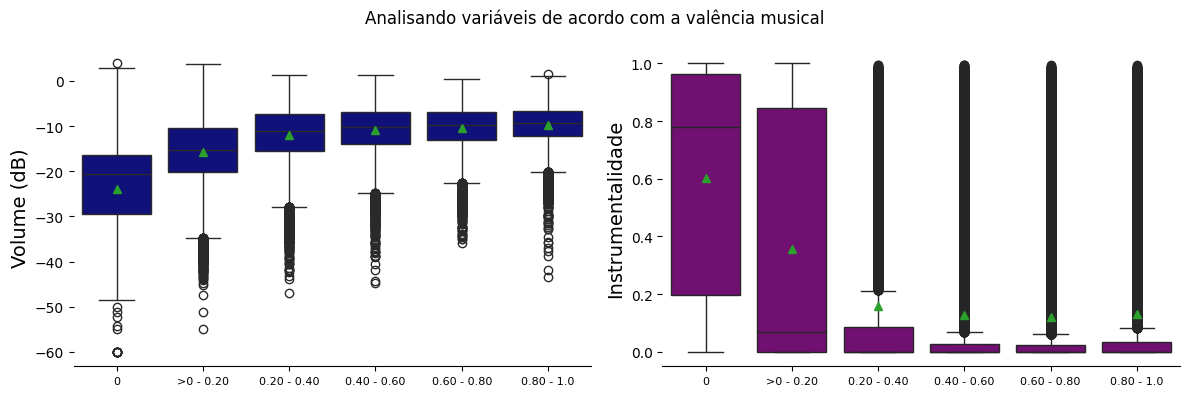

In [57]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), tight_layout=True)

sns.boxplot(data=base1, x='valence_', y='loudness', color='darkblue', showmeans=True, ax=ax[0])
sns.boxplot(data=base1, x='valence_', y='instrumentalness', color='purple', showmeans=True, ax=ax[1])

ax[0].set_ylabel('Volume (dB)', fontsize=14)
ax[1].set_ylabel('Instrumentalidade', fontsize=14)
ax[0].set_xlabel('')
ax[1].set_xlabel('')

plt.suptitle('Analisando variáveis de acordo com a valência musical')
plt.savefig("../images/EDA01_09_analise_variaveis_valencia_2.png")
plt.show()

#### **4.3 Acusticidade:**

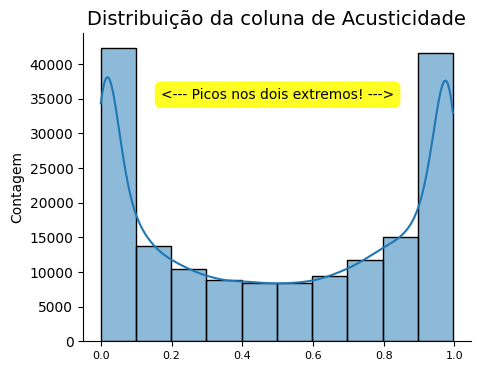

In [58]:
fig, ax = plt.subplots(figsize=(5,4))
sns.histplot(base1.acousticness, kde=True, bins=10)
ax.set_ylabel("Contagem")
ax.set_xlabel("")
ax.set_title("Distribuição da coluna de Acusticidade")
ax.text(0.5,35000, "<--- Picos nos dois extremos! --->", ha='center',
           bbox=dict(facecolor='yellow', edgecolor='yellow', boxstyle='round,pad=0.4', alpha=0.85))
ax.spines['left'].set_visible(True)
plt.savefig("../images/EDA01_10_distribuicao_acusticidade.png")
plt.show()

In [59]:
base1['acousticness_'] = pd.cut(base1['acousticness'],
                        bins=[-0.1, 0.00001, 0.20, 0.40, 0.60, 0.80, 1.0],
                        labels=['0','>0 - 0.20','0.20 - 0.40','0.40 - 0.60','0.60 - 0.80','0.80 - 1.0'])

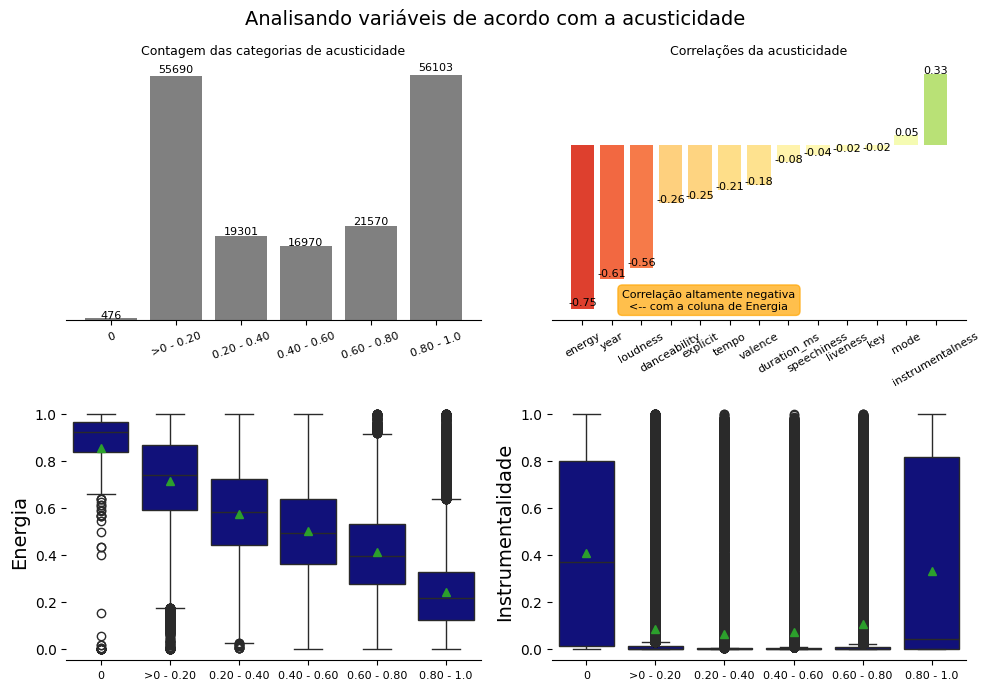

In [60]:
mosaico = "AB;CD"
fig = plt.figure(figsize=(10,7), tight_layout=True)
axs = fig.subplot_mosaic(mosaico)

a = base1.acousticness_.value_counts().sort_index()
axs["A"].bar(a.index, a.values, color='grey')
for i in range(len(a.index)):
    axs["A"].annotate(a.values[i], (i,a.values[i]+a.values[i]*0.02), ha='center', fontsize=8)
axs["A"].yaxis.set_visible(False)
axs["A"].set_xticks(a.index)
axs["A"].set_title("Contagem das categorias de acusticidade", fontsize=9)
axs["A"].set_xticklabels(labels=a.index, rotation=20)

b = correlacoes['acousticness'].sort_values()[:-1]
norm = plt.Normalize(-1, 1)
cmap = plt.cm.RdYlGn
colors = cmap(norm(b.values))

axs["B"].bar(b.index, b.values, color=colors)
for i in range(len(b.index)):
    if b.values[i] < 0:
        axs["B"].annotate(round(b.values[i],2), (b.index[i],b.values[i]-b.values[i]*0.02), ha='center', fontsize=8)
    elif b.values[i] >= 0:
        axs["B"].annotate(round(b.values[i],2), (b.index[i],b.values[i]+b.values[i]*0.02), ha='center', fontsize=8)
axs["B"].yaxis.set_visible(False)
axs["B"].set_xticks(b.index)
axs["B"].set_title("Correlações da acusticidade", fontsize=9)
axs["B"].set_xticklabels(labels=b.index, rotation=30, fontsize=8)
axs["B"].text(4.3, -0.75, "Correlação altamente negativa\n<-- com a coluna de Energia", ha='center', fontsize=8,
           bbox=dict(facecolor='orange', edgecolor='orange', boxstyle='round,pad=0.4', alpha=0.7))

sns.boxplot(data=base1, x='acousticness_', y='energy', color='darkblue', showmeans=True, ax=axs["C"])
sns.boxplot(data=base1, x='acousticness_', y='instrumentalness', color='darkblue', showmeans=True, ax=axs["D"])
axs["C"].set_ylabel('Energia', fontsize=14)
axs["D"].set_ylabel('Instrumentalidade', fontsize=14)
axs["C"].set_xlabel('')
axs["D"].set_xlabel('')

plt.suptitle('Analisando variáveis de acordo com a acusticidade', fontsize=14)
plt.savefig("../images/EDA01_10_analise_variaveis_acusticidade.png")
plt.show()

#### **4.4. Tempo (BPM)**

In [61]:
correlacoes['tempo'].sort_values()

acousticness       -0.206107
instrumentalness   -0.103656
duration_ms        -0.025080
speechiness        -0.012072
danceability        0.000313
key                 0.003047
liveness            0.007446
mode                0.011627
explicit            0.011647
year                0.139571
valence             0.170744
loudness            0.209000
energy              0.250084
tempo               1.000000
Name: tempo, dtype: float64

In [62]:
base1.tempo.describe()

count    170110.000000
mean        116.895498
std          30.697529
min           0.000000
25%          93.478000
50%         114.772500
75%         135.566750
max         243.507000
Name: tempo, dtype: float64

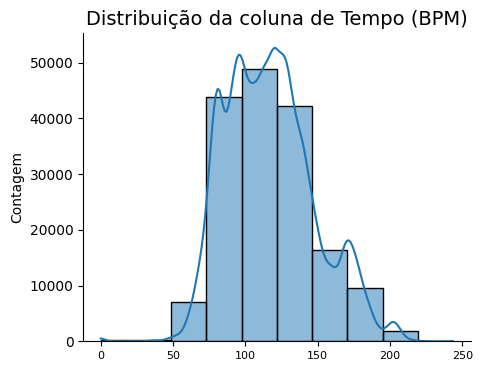

In [63]:
fig, ax = plt.subplots(figsize=(5,4))
sns.histplot(base1.tempo, kde=True, bins=10)
ax.set_ylabel("Contagem")
ax.set_xlabel("")
ax.set_title("Distribuição da coluna de Tempo (BPM)")
#ax.text(0.5,35000, "<--- Picos nos dois extremos! --->", ha='center',
           #bbox=dict(facecolor='yellow', edgecolor='yellow', boxstyle='round,pad=0.4', alpha=0.85))
ax.spines['left'].set_visible(True)
plt.savefig("../images/EDA01_11_distribuicao_tempobpm.png")
plt.show()

**Categorias de BPM - Chat GPT**

- Lento
    - 0 - 60 BPM: Inclui músicas muito lentas, como algumas baladas e músicas atmosféricas. Exemplos: música ambiente, algumas peças clássicas.

- Moderado
    - 60 - 90 BPM: Inclui músicas de ritmo moderado, como muitas músicas pop e rock mais lentas. Exemplos: baladas pop, rock clássico.

- Rápido
    - 90 - 120 BPM: Inclui músicas com ritmo mais rápido, como pop, rock e algumas músicas eletrônicas. Exemplos: música pop, rock alternativo.

- Muito Rápido
    - 120 - 150 BPM: Inclui músicas de ritmo rápido, como dance, techno e alguns estilos de rock. Exemplos: dance, techno, punk rock.

- Extremamente Rápido
    - 150 - 180 BPM: Inclui músicas com ritmos muito rápidos, como música eletrônica, hardcore e alguns estilos de metal. Exemplos: hard trance, speed metal.

- Ultra Rápido
    - 180+ BPM: Inclui músicas com ritmos extremamente rápidos, como alguns estilos de música eletrônica e metal. Exemplos: gabber, drum and bass.

In [64]:
base1['tempo_'] = pd.cut(base1['tempo'],
                        bins=[-0.01, 60, 90, 120, 150, 180, base1['tempo'].max()+1],
                        labels=['0-60','60-90','90-120','120-150','150-180','180+'],
                        right=True)

base1.loc[base1.tempo == 120, ['name','tempo_']].head(1)

,name,tempo_
99,Don't Run,90-120


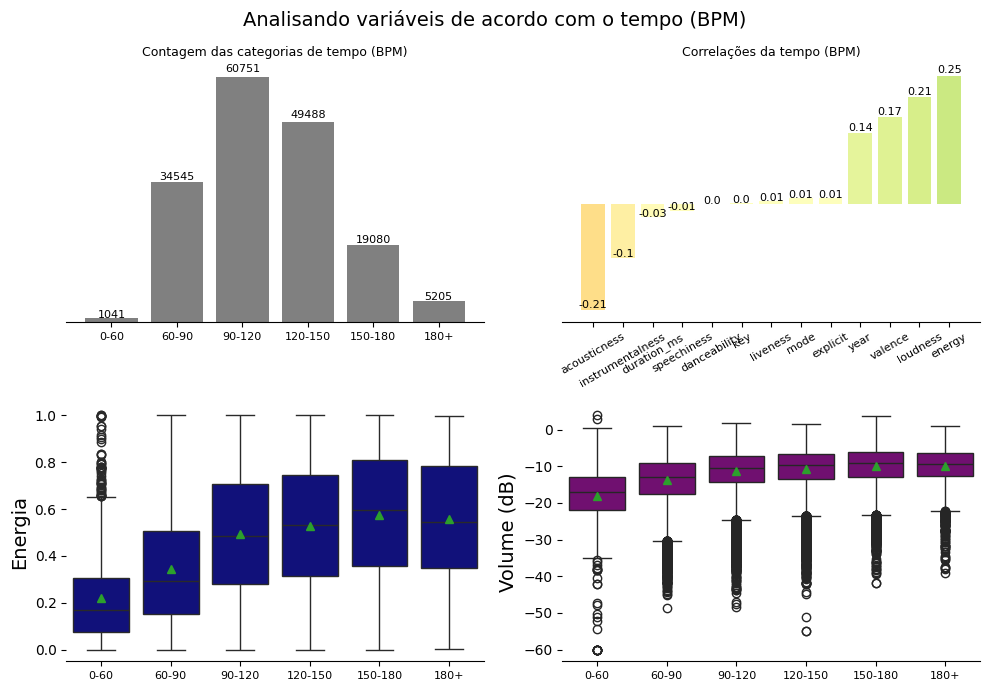

In [65]:
mosaico = "AB;CD"
fig = plt.figure(figsize=(10,7), tight_layout=True)
axs = fig.subplot_mosaic(mosaico)

a = base1.tempo_.value_counts().sort_index()
axs["A"].bar(a.index, a.values, color='grey')
for i in range(len(a.index)):
    axs["A"].annotate(a.values[i], (i,a.values[i]+a.values[i]*0.02), ha='center', fontsize=8)
axs["A"].yaxis.set_visible(False)
axs["A"].set_xticks(a.index)
axs["A"].set_title("Contagem das categorias de tempo (BPM)", fontsize=9)
axs["A"].set_xticklabels(labels=a.index, rotation=0)

b = correlacoes['tempo'].sort_values()[:-1]
norm = plt.Normalize(-1, 1)
cmap = plt.cm.RdYlGn
colors = cmap(norm(b.values))

axs["B"].bar(b.index, b.values, color=colors)
for i in range(len(b.index)):
    if b.values[i] < 0:
        axs["B"].annotate(round(b.values[i],2), (b.index[i],b.values[i]-b.values[i]*0.02), ha='center', fontsize=8)
    elif b.values[i] >= 0:
        axs["B"].annotate(round(b.values[i],2), (b.index[i],b.values[i]+b.values[i]*0.02), ha='center', fontsize=8)
axs["B"].yaxis.set_visible(False)
axs["B"].set_xticks(b.index)
axs["B"].set_title("Correlações da tempo (BPM)", fontsize=9)
axs["B"].set_xticklabels(labels=b.index, rotation=30, fontsize=8)

sns.boxplot(data=base1, x='tempo_', y='energy', color='darkblue', showmeans=True, ax=axs["C"])
sns.boxplot(data=base1, x='tempo_', y='loudness', color='purple', showmeans=True, ax=axs["D"])
axs["C"].set_ylabel('Energia', fontsize=14)
axs["D"].set_ylabel('Volume (dB)', fontsize=14)
axs["C"].set_xlabel('')
axs["D"].set_xlabel('')

plt.suptitle('Analisando variáveis de acordo com o tempo (BPM)', fontsize=14)
plt.savefig("../images/EDA01_11_analise_variaveis_tempobpm.png")
plt.show()

#### **5. Exportando a base para a continuação no "01_EDA_pt2.ipynb"**

In [66]:
base1.to_csv("../data/base_.csv", index=False)